/root/miniconda/envs/rep_py2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


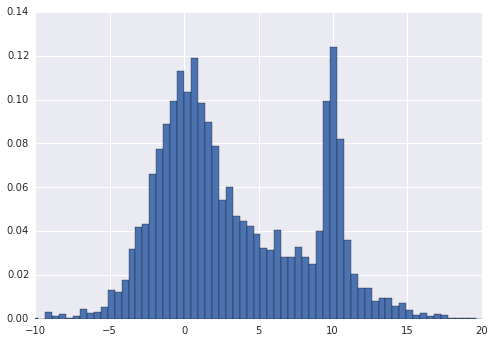

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

np.random.seed(2)
x = np.concatenate([np.random.normal(0, 2, 2000),
                    np.random.normal(5, 5, 2000),
                    np.random.normal(10, 0.5, 600)])
plt.hist(x, 80, normed=True)
plt.xlim(-10, 20);

(-10, 20)

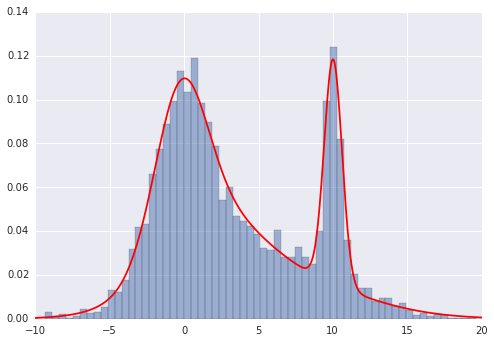

In [2]:
from sklearn.mixture import GMM
clf = GMM(4, n_iter=500, random_state=3, n_init=10).fit(x[:, np.newaxis])
xpdf = np.linspace(-10, 20, 1000)[:, np.newaxis]
density = np.exp(clf.score(xpdf))

plt.hist(x, 80, normed=True, alpha=0.5)
plt.plot(xpdf, density, '-r')
plt.xlim(-10, 20)

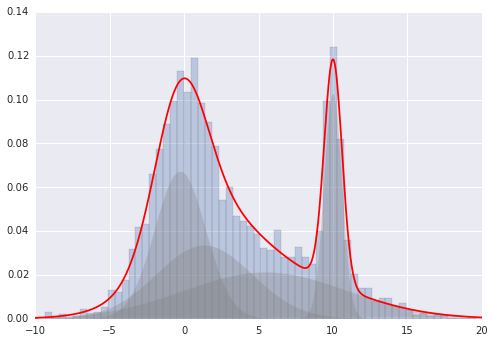

In [3]:
plt.hist(x, 80, normed=True, alpha=0.3)
plt.plot(xpdf, density, '-r')

for i in range(clf.n_components):
    pdf = clf.weights_[i] * stats.norm(clf.means_[i, 0],
                                       np.sqrt(clf.covars_[i, 0])).pdf(xpdf)
    plt.fill(xpdf, pdf, facecolor='gray',
             edgecolor='none', alpha=0.3)
plt.xlim(-10, 20);

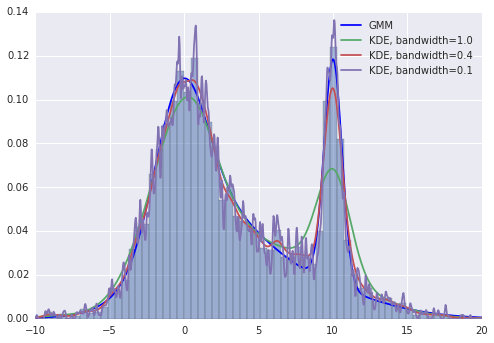

In [6]:
from itertools import izip
from sklearn.neighbors import KernelDensity
density_kdes = list()
bandwidths = ( 1.0,0.4,0.05)
for bandwidth in bandwidths:
    kde = KernelDensity(bandwidth).fit(x[:, None])
    density_kdes.append(np.exp(kde.score_samples(xpdf)))

plt.hist(x, 80, normed=True, alpha=0.5)
plt.plot(xpdf, density, '-b', label='GMM')
for bandwidth, density_kde in izip(bandwidths, density_kdes):
    plt.plot(xpdf, density_kde, '-', label=r'KDE, bandwidth=%.1f' % bandwidth)
plt.xlim(-10, 20)
plt.legend();

In [7]:
import root_pandas
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score

data = root_pandas.read_root("/notebooks/public_train_100000.root")
features = data[list(set(data.columns) - {"event_id", "target"})]
target = data["target"]

trainX, testX, trainY, testY = train_test_split(features, target, random_state=42)
knn_clf = KNeighborsClassifier(n_neighbors=1)
knn_clf.fit(trainX, trainY)
print roc_auc_score(testY, knn_clf.predict_proba(testX)[:, 1])

cv_scores = cross_val_score(
    KNeighborsClassifier(n_neighbors=1), features, target, scoring='roc_auc', n_jobs=4, cv=4)

print np.mean(cv_scores), np.std(cv_scores)

0.620395879346
0.615921315194 0.00773400891034


In [17]:
import root_pandas
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score

data = root_pandas.read_root("/notebooks/public_train_100000.root")
features = data[["m_jj", "m_bb", "m_wbb", "m_jlv","target"]]
target = data["target"]

trainX, testX, trainY, testY = train_test_split(features, target, random_state=42)

trainX_sig = trainX[trainX.target == 1][["m_jj", "m_bb", "m_wbb", "m_jlv"]]
trainX_bkg = trainX[trainX.target == 0][["m_jj", "m_bb", "m_wbb", "m_jlv"]]

from itertools import izip
from sklearn.neighbors import KernelDensity

#kde_bkg = KernelDensity(1).fit(trainX_bkg)

m_jj        m_bb       m_wbb       m_jlv
98980   71.924835  149.030258  259.795959  143.535446
9928    77.597618  123.056030  323.559326  270.843903
95621  110.761749   80.117172  283.916290  236.449371
80724  129.064636  123.070343  461.372955  159.571289
14672   84.095116   76.538872  259.508911  126.928574
79932  107.208984  125.774605  363.044617  242.892792
97311  173.944519   93.707932  396.983643  190.915039
943     71.687828   86.920303  490.983612  167.506821
44071   40.217621  152.449127  461.630096  272.336029
23139   79.311760   63.063339  321.418854  232.270569
14569   69.868767   92.473305  293.766998  119.050484
40206   80.044762  100.285660  296.127136  216.154495
73139   94.132187  111.616005  349.493896  278.180145
69149   72.964203   87.861824  274.917877  215.649078
75849  159.715012   70.202393  257.089386  176.208420
48827   59.578465  121.064056  309.086700  225.300568
85934   52.343693  105.319885  299.848419  100.389221
67465   83.078407  124.621117  332.325470  160.778152
47682   74.456032  112.883720  336.199097  233.930847
7671    98.834717   55.305500  185.798279  117.288918
40063   86.449699  123.838379  340.810883  155.537811
82280   67.113655  151.044235  317.854980  179.724121
4431    79.583878  426.495300  582.367004  302.152313
49857   73.551514   43.495647  295.867889  205.623505
99725   61.075779   95.179077  294.294312  168.068039
69451   77.480957   44.044296  202.759521  111.787338
97024   76.973022  103.674965  303.302094  165.243759
11699  127.362297  149.055649  717.693665  237.356186
35908   80.495247   36.808681  352.582611  213.230606
2165    87.574570  121.470123  402.733185  359.510284
...           ...         ...         ...         ...
35920  101.799477  126.439590  313.763885  154.538681
76552   78.196777   73.223846  241.021805  199.811188
43001   88.467232   95.350571  277.127319  132.094391
73969  167.465424   63.711586  328.638947  136.426285
10627  189.775833   87.518715  370.707855  136.151550
87313   77.031433  122.288147  284.457397  202.604324
80038   67.903732  101.537453  301.603271  237.798462
96276   76.367546   62.860527  270.239960  195.417770
56886   75.459419  114.112984  293.373810  165.936234
67435   89.322357   82.122429  289.981689  105.983658
35773   80.548485  124.173088  396.955566  150.317917
84654  181.554474   38.121906  275.516388  150.896255
2747   169.034332   34.164612  326.248505  121.958382
18431   80.300438   97.863388  298.408386  188.056244
25658   92.142174  230.738647  395.431152  193.894348
93016   76.761253   29.222460  259.463226  164.417191
71932  114.772202  116.699791  420.751129  238.170547
53707   80.196663   97.507294  290.228607  148.655243
83104   88.894218   93.918839  287.599457  184.240891
5311    96.890358  106.547569  295.091187  250.945496
64925   63.734127  122.677406  378.657684  227.216751
59735   98.172203   57.608429  230.770294   95.772720
67221   64.472939  132.999222  353.170258  213.691116
41090   80.098625   40.419453  212.217850  112.048264
16023   74.179886  112.858131  323.778778  227.414734
44131  155.203369  174.862244  514.192383  163.279190
82386   75.587090   91.396729  247.797546  155.784210
6265    88.527466   83.398010  285.829437  151.702225
54886   68.278008  102.499138  267.004913  139.205627
15795   82.222404  101.595100  367.039185  242.813171

[39883 rows x 4 columns]